<div class="alert alert-block alert-success">
    <h3 align="center">K-Nearest Neighbor (Breast Cancer Dataset)</h3>
</div>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# Initializing the dataframe
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [30]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [33]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [36]:
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [6]:
print(cancer.target_names)

['malignant' 'benign']


In [7]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=42)

In [9]:
 X_train.shape

(426, 30)

In [10]:
 X_test.shape

(143, 30)

In [11]:
 y_train.shape

(426,)

In [12]:
y_test.shape

(143,)

In [56]:
# Convert the target (which is a NumPy array) into a pandas Series for easy manipulation
target_series = pd.Series(cancer.target)

# Get the count of each target category (benign and malignant)
target_counts = target_series.value_counts()
target_counts 

1    357
0    212
dtype: int64

<AxesSubplot:ylabel='count'>

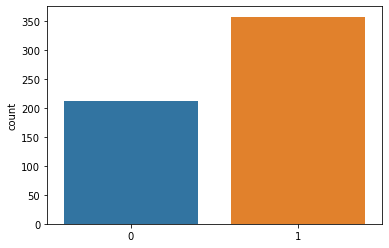

In [13]:
sns.countplot(cancer.target)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

### KNN n-neighbors=5

In [15]:
knn = KNeighborsClassifier()
#n_neighbors = 5

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred = knn.predict(X_test)

In [18]:
knn.score(X_train, y_train)

0.9342723004694836

In [19]:
knn.score(X_test, y_test)

0.965034965034965

In [20]:
from sklearn.metrics import accuracy_score
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.965034965034965


### KNN n-neighbors=5 with cross_validation

In [21]:
from sklearn.model_selection import cross_val_score
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors here

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # cv=5 for 5-fold CV

# Print the individual fold scores
print("Cross-validation scores for each fold:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(cv_scores):.4f}")

Cross-validation scores for each fold: [0.95348837 0.87058824 0.97647059 0.85882353 0.91764706]
Mean cross-validation accuracy: 0.9154
Standard deviation of cross-validation accuracy: 0.0456


### KNN n-neighbors = range (1-40) and with cross_validation

In [22]:
cv_scores_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # cv=5 for 5-fold CV
    # Print the individual fold scores
    print("-" * 50)
    print("Cross-validation scores for each fold:", cv_scores)
    # Print the mean and standard deviation of the cross-validation scores
    print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.4f}")
    print(f"Standard deviation of cross-validation accuracy: {np.std(cv_scores):.4f}")
    cv_scores_rate.append(np.mean(cv_scores))

--------------------------------------------------
Cross-validation scores for each fold: [0.96511628 0.87058824 0.90588235 0.89411765 0.89411765]
Mean cross-validation accuracy: 0.9060
Standard deviation of cross-validation accuracy: 0.0317
--------------------------------------------------
Cross-validation scores for each fold: [0.95348837 0.90588235 0.91764706 0.88235294 0.90588235]
Mean cross-validation accuracy: 0.9131
Standard deviation of cross-validation accuracy: 0.0232
--------------------------------------------------
Cross-validation scores for each fold: [0.95348837 0.88235294 0.97647059 0.88235294 0.90588235]
Mean cross-validation accuracy: 0.9201
Standard deviation of cross-validation accuracy: 0.0383
--------------------------------------------------
Cross-validation scores for each fold: [0.95348837 0.88235294 0.95294118 0.85882353 0.90588235]
Mean cross-validation accuracy: 0.9107
Standard deviation of cross-validation accuracy: 0.0378
--------------------------------

Text(0, 0.5, 'cv_scores Rate')

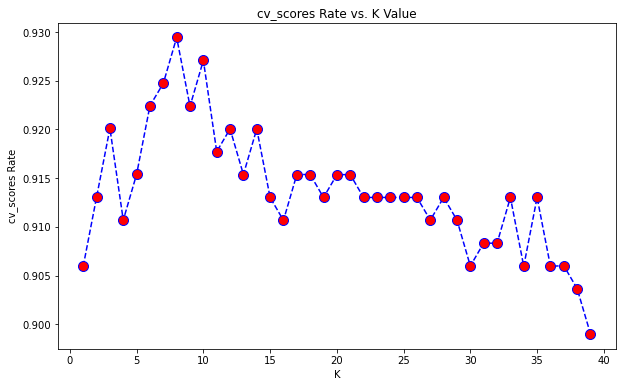

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),cv_scores_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('cv_scores Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('cv_scores Rate')

### KNN n-neighbors range (1_40) and compute accuracy and error 

In [24]:
# Initialize an empty list to store accuracy values
accuracy_list = []

# Loop over values of n_neighbors from 1 to 39
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)  # Train the KNN model
    pred_i = knn.predict(X_test)  # Predict the test set
    accuracy = np.mean(pred_i == y_test)  # Calculate and store accuracy (correct predictions)
    accuracy_list.append(accuracy)  # Store the accuracy

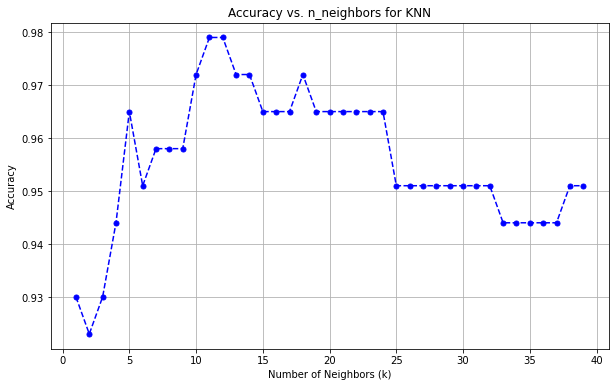

In [25]:
# Plotting the accuracy for different values of n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), accuracy_list, color='blue', linestyle='dashed', marker='o', markersize=5)
plt.title('Accuracy vs. n_neighbors for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [26]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

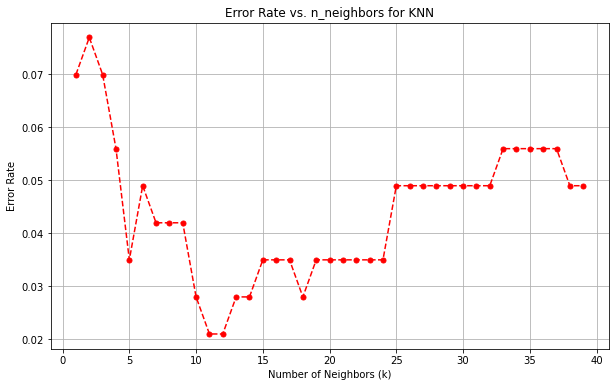

In [27]:
# Plotting the error rate for different values of n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='red', linestyle='dashed', marker='o', markersize=5)
plt.title('Error Rate vs. n_neighbors for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

### KNN n-neighbors = range (1-40) and with Cross_Validation and Grid Search

In [28]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search over
param_grid = {
    'n_neighbors': range(1, 40)  # Trying values from 1 to 20 for n_neighbors
}

# Set up the grid search (without cross-validation)
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, n_jobs=-1, cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameter (n_neighbors)
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Best number of neighbors: {best_n_neighbors}")

# Evaluate the model with the best hyperparameters
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Best number of neighbors: 8
Accuracy: 0.9580


performing a grid search for hyperparameters such as `n_neighbors` is a different process compared to manually selecting a value based on a single validation or test set result.

#### Key Differences:

- **Grid Search**: The grid search automates the process of trying different values of hyperparameters (like `n_neighbors`), often using cross-validation to get a more generalized understanding of which hyperparameters perform best. It helps avoid overfitting on a single train-test split and ensures the model works well across various subsets of the data.

- **Manual Selection**: Manually selecting a hyperparameter value (like `n_neighbors=11`) without a structured search might lead to choosing a value that works well for a specific split but may not generalize well across different data splits.


### Best result based on grid search

In [51]:
knn = KNeighborsClassifier(n_neighbors = 8)
#n_neighbors = 5
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9389671361502347
0.958041958041958


In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        54
           1       0.96      0.98      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



<AxesSubplot:>

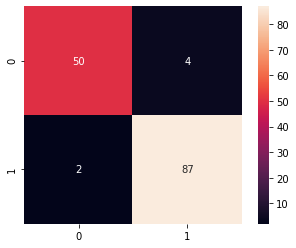

In [53]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True , annot=True)